In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset, SubsetRandomSampler
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import train, test
from PIL import Image
import pandas as pd
import numpy as np
from convnet import ConvNet

In [2]:
cifar10_root = '../cifar10'
ipc1000 = np.loadtxt('./random_ipc_index/cifar10/ipc_1000.txt', dtype=int)
ipc1000

array([42823,  4837,     0, ..., 14936,   515,  5070])

In [3]:
cifar10_train = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=True,
                                            transform=transforms.Compose([
                                                                          # transforms.Resize(128),
                                                                          transforms.RandomHorizontalFlip(),
                                                                          transforms.ToTensor(),
                                                                          transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                                                                        ]))


cifar10_test = torchvision.datasets.CIFAR10(cifar10_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [4]:
batch_size = 64
train_data_loader = DataLoader(cifar10_train, batch_size=batch_size, sampler=SubsetRandomSampler(ipc1000))
test_data_loader = DataLoader(cifar10_test, batch_size=batch_size, shuffle=False)

In [5]:
len(train_data_loader)

157

In [6]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [7]:
import os

model_name = 'ConvNetD3'
dataset = 'cifar10_ipc1000'
model_path = f'./model_weight/{dataset}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=10, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [8]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 157/157 [00:02<00:00, 64.79it/s, loss=1.63]


epoch: 1 done, loss: 0.005732330027967691
Acc: 0.4619
[0.001]


Epoch 2: 100%|██████████| 157/157 [00:01<00:00, 86.71it/s, loss=0.958]


epoch: 2 done, loss: 0.004396469332277775
Acc: 0.5462
[0.001]


Epoch 3: 100%|██████████| 157/157 [00:01<00:00, 90.38it/s, loss=1.12] 


epoch: 3 done, loss: 0.003849591827020049
Acc: 0.5851
[0.001]


Epoch 4: 100%|██████████| 157/157 [00:01<00:00, 94.32it/s, loss=0.804]


epoch: 4 done, loss: 0.0035012264270335436
Acc: 0.5907
[0.001]


Epoch 5: 100%|██████████| 157/157 [00:01<00:00, 84.84it/s, loss=0.774]


epoch: 5 done, loss: 0.003274972550570965
Acc: 0.6036
[0.001]


Epoch 6: 100%|██████████| 157/157 [00:01<00:00, 83.89it/s, loss=1.38] 


epoch: 6 done, loss: 0.0031073365826159716
Acc: 0.6253
[0.001]


Epoch 7: 100%|██████████| 157/157 [00:01<00:00, 90.15it/s, loss=0.998]


epoch: 7 done, loss: 0.0029802308417856693
Acc: 0.6392
[0.001]


Epoch 8: 100%|██████████| 157/157 [00:01<00:00, 87.31it/s, loss=0.518]


epoch: 8 done, loss: 0.002841223729774356
Acc: 0.6399
[0.001]


Epoch 9: 100%|██████████| 157/157 [00:01<00:00, 86.69it/s, loss=0.639]


epoch: 9 done, loss: 0.002733060857281089
Acc: 0.6378
[0.001]


Epoch 10: 100%|██████████| 157/157 [00:01<00:00, 87.26it/s, loss=1.57] 


epoch: 10 done, loss: 0.0026610116474330425
Acc: 0.6448
[0.001]


Epoch 11: 100%|██████████| 157/157 [00:01<00:00, 83.47it/s, loss=0.832]


epoch: 11 done, loss: 0.002577375154942274
Acc: 0.6466
[0.001]


Epoch 12: 100%|██████████| 157/157 [00:01<00:00, 79.66it/s, loss=1.06] 


epoch: 12 done, loss: 0.0025110903661698103
Acc: 0.6595
[0.001]


Epoch 13: 100%|██████████| 157/157 [00:01<00:00, 84.99it/s, loss=0.546]


epoch: 13 done, loss: 0.002408276777714491
Acc: 0.6507
[0.001]


Epoch 14: 100%|██████████| 157/157 [00:01<00:00, 80.19it/s, loss=0.405]


epoch: 14 done, loss: 0.0023559932596981525
Acc: 0.6531
[0.001]


Epoch 15: 100%|██████████| 157/157 [00:01<00:00, 84.26it/s, loss=1.09] 


epoch: 15 done, loss: 0.002298208652064204
Acc: 0.6553
[0.001]


Epoch 16: 100%|██████████| 157/157 [00:01<00:00, 83.07it/s, loss=0.576]


epoch: 16 done, loss: 0.002209268743172288
Acc: 0.6566
[0.0001]


Epoch 17: 100%|██████████| 157/157 [00:01<00:00, 82.29it/s, loss=0.76] 


epoch: 17 done, loss: 0.0019167038844898343
Acc: 0.6793
[0.0001]


Epoch 18: 100%|██████████| 157/157 [00:02<00:00, 77.71it/s, loss=0.65] 


epoch: 18 done, loss: 0.001841643126681447
Acc: 0.6799
[0.0001]


Epoch 19: 100%|██████████| 157/157 [00:01<00:00, 83.43it/s, loss=0.363]


epoch: 19 done, loss: 0.0018260970246046782
Acc: 0.6811
[0.0001]


Epoch 20: 100%|██████████| 157/157 [00:01<00:00, 84.70it/s, loss=0.459]


epoch: 20 done, loss: 0.0018182803178206086
Acc: 0.6798
[0.0001]


Epoch 21: 100%|██████████| 157/157 [00:01<00:00, 96.74it/s, loss=0.811] 


epoch: 21 done, loss: 0.0017845737747848034
Acc: 0.6825
[0.0001]


Epoch 22: 100%|██████████| 157/157 [00:01<00:00, 90.74it/s, loss=0.338]


epoch: 22 done, loss: 0.0017844317480921745
Acc: 0.6818
[0.0001]


Epoch 23: 100%|██████████| 157/157 [00:01<00:00, 90.76it/s, loss=0.777]


epoch: 23 done, loss: 0.0017593081574887037
Acc: 0.6817
[0.0001]


Epoch 24: 100%|██████████| 157/157 [00:01<00:00, 87.66it/s, loss=0.511]


epoch: 24 done, loss: 0.0017610485665500164
Acc: 0.6837
[0.0001]


Epoch 25: 100%|██████████| 157/157 [00:01<00:00, 87.29it/s, loss=0.549]


epoch: 25 done, loss: 0.0017441629897803068
Acc: 0.684
[0.0001]


Epoch 26: 100%|██████████| 157/157 [00:01<00:00, 84.49it/s, loss=0.456]


epoch: 26 done, loss: 0.0017363717779517174
Acc: 0.6818
[0.0001]


Epoch 27: 100%|██████████| 157/157 [00:01<00:00, 83.07it/s, loss=0.351]


epoch: 27 done, loss: 0.001711973687633872
Acc: 0.6833
[0.0001]


Epoch 28: 100%|██████████| 157/157 [00:01<00:00, 83.70it/s, loss=0.416]


epoch: 28 done, loss: 0.0017097241943702102
Acc: 0.6804
[1e-05]


Epoch 29: 100%|██████████| 157/157 [00:01<00:00, 81.63it/s, loss=0.674]


epoch: 29 done, loss: 0.0016726972535252571
Acc: 0.683
[1e-05]


Epoch 30: 100%|██████████| 157/157 [00:01<00:00, 82.33it/s, loss=0.441]


epoch: 30 done, loss: 0.0016583690885454416
Acc: 0.6842
[1e-05]


Epoch 31: 100%|██████████| 157/157 [00:01<00:00, 91.97it/s, loss=0.484]


epoch: 31 done, loss: 0.001655388856306672
Acc: 0.6852
[1e-05]


Epoch 32: 100%|██████████| 157/157 [00:01<00:00, 86.57it/s, loss=1.29] 


epoch: 32 done, loss: 0.001663746195845306
Acc: 0.6841
[1e-05]


Epoch 33: 100%|██████████| 157/157 [00:01<00:00, 80.52it/s, loss=0.44] 


epoch: 33 done, loss: 0.0016562516102567315
Acc: 0.6835
[1e-05]


Epoch 34: 100%|██████████| 157/157 [00:01<00:00, 83.54it/s, loss=0.714]


epoch: 34 done, loss: 0.0016560542862862349
Acc: 0.6845
[1e-05]


Epoch 35: 100%|██████████| 157/157 [00:01<00:00, 83.36it/s, loss=0.522]


epoch: 35 done, loss: 0.001653527608141303
Acc: 0.6845
[1e-05]


Epoch 36: 100%|██████████| 157/157 [00:01<00:00, 81.54it/s, loss=0.598]


epoch: 36 done, loss: 0.001653930637985468
Acc: 0.6847
[1e-05]


Epoch 37: 100%|██████████| 157/157 [00:01<00:00, 84.69it/s, loss=0.741]


epoch: 37 done, loss: 0.0016523306258022785
Acc: 0.6839
[1e-05]


Epoch 38: 100%|██████████| 157/157 [00:01<00:00, 86.31it/s, loss=0.485]


epoch: 38 done, loss: 0.0016525582177564502
Acc: 0.6851
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 157/157 [00:01<00:00, 82.20it/s, loss=0.505]


epoch: 39 done, loss: 0.0016431683907285333
Acc: 0.6848
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 157/157 [00:02<00:00, 76.80it/s, loss=0.456]


epoch: 40 done, loss: 0.0016302327858284116
Acc: 0.6849
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 157/157 [00:02<00:00, 73.38it/s, loss=0.587]


epoch: 41 done, loss: 0.0016458218451589346
Acc: 0.685
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 157/157 [00:02<00:00, 69.59it/s, loss=0.682]


epoch: 42 done, loss: 0.0016432530246675014
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 157/157 [00:02<00:00, 70.75it/s, loss=0.469]


epoch: 43 done, loss: 0.0016261579003185034
Acc: 0.6844
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 157/157 [00:02<00:00, 68.78it/s, loss=0.518]


epoch: 44 done, loss: 0.0016297666588798165
Acc: 0.6844
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 157/157 [00:02<00:00, 67.88it/s, loss=0.429]


epoch: 45 done, loss: 0.001640697126276791
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 157/157 [00:02<00:00, 65.71it/s, loss=0.553]


epoch: 46 done, loss: 0.0016564115649089217
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 157/157 [00:02<00:00, 66.59it/s, loss=0.521]


epoch: 47 done, loss: 0.0016363804461434484
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 157/157 [00:02<00:00, 67.28it/s, loss=0.362]


epoch: 48 done, loss: 0.0016321635339409113
Acc: 0.6848
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 157/157 [00:02<00:00, 65.23it/s, loss=0.543]


epoch: 49 done, loss: 0.0016355555271729827
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 157/157 [00:02<00:00, 62.24it/s, loss=0.372]


epoch: 50 done, loss: 0.0016377151478081942
Acc: 0.6845
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 157/157 [00:02<00:00, 64.92it/s, loss=0.291]


epoch: 51 done, loss: 0.0016407815273851156
Acc: 0.6844
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 157/157 [00:02<00:00, 63.76it/s, loss=0.284]


epoch: 52 done, loss: 0.0016283774748444557
Acc: 0.6845
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 157/157 [00:02<00:00, 63.72it/s, loss=0.482]


epoch: 53 done, loss: 0.0016389144584536552
Acc: 0.6844
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 157/157 [00:02<00:00, 60.21it/s, loss=0.663]


epoch: 54 done, loss: 0.001646685879677534
Acc: 0.6844
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 157/157 [00:02<00:00, 63.16it/s, loss=0.505]


epoch: 55 done, loss: 0.0016464781947433949
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 157/157 [00:02<00:00, 64.99it/s, loss=0.767]


epoch: 56 done, loss: 0.001656792708672583
Acc: 0.6845
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 157/157 [00:02<00:00, 57.36it/s, loss=0.693]


epoch: 57 done, loss: 0.0016282005235552788
Acc: 0.6843
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 157/157 [00:02<00:00, 53.98it/s, loss=0.624]


epoch: 58 done, loss: 0.0016485260566696525
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 157/157 [00:02<00:00, 56.48it/s, loss=0.547]


epoch: 59 done, loss: 0.0016287453472614288
Acc: 0.6845
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 157/157 [00:02<00:00, 58.27it/s, loss=0.497]


epoch: 60 done, loss: 0.0016393938567489386
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 157/157 [00:02<00:00, 57.07it/s, loss=0.49] 


epoch: 61 done, loss: 0.0016326990444213152
Acc: 0.6845
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 157/157 [00:02<00:00, 57.18it/s, loss=0.618]


epoch: 62 done, loss: 0.0016465788939967752
Acc: 0.6844
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 157/157 [00:02<00:00, 56.00it/s, loss=0.78] 


epoch: 63 done, loss: 0.0016408920055255294
Acc: 0.6848
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 157/157 [00:02<00:00, 56.40it/s, loss=0.648]


epoch: 64 done, loss: 0.0016453501302748919
Acc: 0.6845
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 157/157 [00:02<00:00, 53.51it/s, loss=0.336]


epoch: 65 done, loss: 0.001646998687647283
Acc: 0.6851
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 157/157 [00:02<00:00, 56.50it/s, loss=0.455]


epoch: 66 done, loss: 0.0016315261600539088
Acc: 0.6848
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 157/157 [00:02<00:00, 55.26it/s, loss=0.784]


epoch: 67 done, loss: 0.001652884646318853
Acc: 0.6849
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 157/157 [00:02<00:00, 57.21it/s, loss=0.508]


epoch: 68 done, loss: 0.0016310480423271656
Acc: 0.6849
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 157/157 [00:02<00:00, 54.82it/s, loss=0.435]


epoch: 69 done, loss: 0.0016335136024281383
Acc: 0.685
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 157/157 [00:02<00:00, 54.59it/s, loss=0.261]


epoch: 70 done, loss: 0.0016397548606619239
Acc: 0.6853
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 157/157 [00:02<00:00, 54.45it/s, loss=0.413]


epoch: 71 done, loss: 0.0016379947774112225
Acc: 0.6849
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 157/157 [00:02<00:00, 58.11it/s, loss=0.269]


epoch: 72 done, loss: 0.0016479900805279613
Acc: 0.6849
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 157/157 [00:02<00:00, 54.46it/s, loss=0.359]


epoch: 73 done, loss: 0.0016411375254392624
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 157/157 [00:02<00:00, 55.55it/s, loss=0.852]


epoch: 74 done, loss: 0.0016460497863590717
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 157/157 [00:02<00:00, 55.46it/s, loss=0.415]


epoch: 75 done, loss: 0.0016398917650803924
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 157/157 [00:02<00:00, 55.86it/s, loss=0.885]


epoch: 76 done, loss: 0.0016566806007176638
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 157/157 [00:02<00:00, 57.45it/s, loss=0.427]


epoch: 77 done, loss: 0.0016306074103340507
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 157/157 [00:02<00:00, 55.73it/s, loss=0.636]


epoch: 78 done, loss: 0.0016280107665807009
Acc: 0.6845
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 157/157 [00:02<00:00, 56.58it/s, loss=0.663]


epoch: 79 done, loss: 0.0016369817312806845
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 157/157 [00:02<00:00, 56.19it/s, loss=0.272]


epoch: 80 done, loss: 0.0016376686980947852
Acc: 0.6848
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 157/157 [00:02<00:00, 54.02it/s, loss=0.396]


epoch: 81 done, loss: 0.0016443110071122646
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 157/157 [00:02<00:00, 55.91it/s, loss=0.577]


epoch: 82 done, loss: 0.0016425513895228505
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 157/157 [00:02<00:00, 55.61it/s, loss=0.46] 


epoch: 83 done, loss: 0.0016424832865595818
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 157/157 [00:02<00:00, 59.11it/s, loss=0.469]


epoch: 84 done, loss: 0.0016398854786530137
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 157/157 [00:02<00:00, 54.95it/s, loss=0.338]


epoch: 85 done, loss: 0.001637967536225915
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 157/157 [00:02<00:00, 56.89it/s, loss=0.42] 


epoch: 86 done, loss: 0.001634498592466116
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 157/157 [00:02<00:00, 53.59it/s, loss=0.265]


epoch: 87 done, loss: 0.0016192687908187509
Acc: 0.6844
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 157/157 [00:02<00:00, 54.20it/s, loss=0.43] 


epoch: 88 done, loss: 0.0016372852260246873
Acc: 0.6842
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 157/157 [00:02<00:00, 58.61it/s, loss=0.528]


epoch: 89 done, loss: 0.0016441276529803872
Acc: 0.6845
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 157/157 [00:02<00:00, 55.67it/s, loss=0.505]


epoch: 90 done, loss: 0.0016399389132857323
Acc: 0.6845
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 157/157 [00:02<00:00, 53.88it/s, loss=0.367]


epoch: 91 done, loss: 0.001627699239179492
Acc: 0.6844
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 157/157 [00:02<00:00, 54.29it/s, loss=0.537]


epoch: 92 done, loss: 0.0016455097356811166
Acc: 0.6843
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 157/157 [00:03<00:00, 50.78it/s, loss=0.249]


epoch: 93 done, loss: 0.0016376569401472807
Acc: 0.6848
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 157/157 [00:02<00:00, 52.67it/s, loss=0.337]


epoch: 94 done, loss: 0.001626242301426828
Acc: 0.6847
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 157/157 [00:02<00:00, 57.72it/s, loss=0.676]


epoch: 95 done, loss: 0.001656887587159872
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 157/157 [00:02<00:00, 63.18it/s, loss=0.32] 


epoch: 96 done, loss: 0.001640233094803989
Acc: 0.6846
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 157/157 [00:02<00:00, 60.00it/s, loss=0.427]


epoch: 97 done, loss: 0.0016308544436469674
Acc: 0.6843
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 157/157 [00:02<00:00, 59.54it/s, loss=0.446]


epoch: 98 done, loss: 0.001627566060051322
Acc: 0.6843
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 157/157 [00:02<00:00, 60.51it/s, loss=0.739]


epoch: 99 done, loss: 0.0016371229430660605
Acc: 0.6843
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 157/157 [00:02<00:00, 55.76it/s, loss=0.45] 


epoch: 100 done, loss: 0.001630893792025745
Acc: 0.684
[1.0000000000000002e-06]
Time taken: 434.088275 seconds


In [9]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.6853, tensor(0.0145, device='cuda:0'))

<AxesSubplot: >

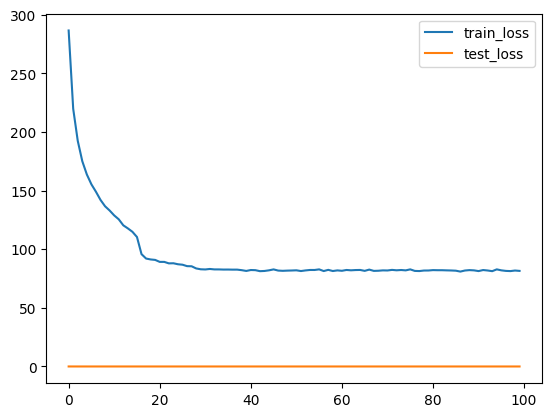

In [10]:
import pandas as pd
results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])